In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

In [86]:
data = pd.read_csv('catlg_data.csv')

In [87]:
#Generated Dummy Dataset
data

,Image_Score,Keywords_Description,Product_metadata,Profile_Rating,Level_of_Product_Certification,Catalog_Score
0,0.99,3,1,2,2,4
1,0.81,18,3,4,2,7
2,0.76,14,4,0,1,7
3,0.83,20,3,4,4,8
4,0.77,18,0,1,4,10
...,...,...,...,...,...,...
995,0.89,4,0,3,4,6
996,0.96,10,0,1,4,9
997,0.78,1,2,2,3,10
998,0.80,12,4,5,2,3


In [88]:
x = data.drop('Catalog_Score', axis=1)
y = data['Catalog_Score']

In [89]:
y

0       4
1       7
2       7
3       8
4      10
       ..
995     6
996     9
997    10
998     3
999     5
Name: Catalog_Score, Length: 1000, dtype: int64

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [91]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)

Shape of X_train: (800, 5)
Shape of X_test: (200, 5)


In [92]:
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [93]:
import pickle

In [94]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [95]:
import pickle

# Load the saved model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can use the loaded model for predictions or check its properties
print(loaded_model)

RandomForestClassifier(n_estimators=10, random_state=0)


In [96]:
if hasattr(loaded_model, 'get_params'):
    print("Model Parameters:")
    print(loaded_model.get_params())

Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [ ]:
predictions = loaded_model.predict(x_test)

In [98]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(x_test)

In [99]:
shap_feature_contributions = shap_values.values

In [100]:
absolute_shap_values = np.abs(shap_feature_contributions)

# Calculate the sum of absolute SHAP values for each feature across all instances and classes
sum_shap_values = np.abs(shap_feature_contributions).sum(axis=0)

# Print the global feature importance
print("Global feature importance:")
for i, importance in enumerate(sum_shap_values):
    print(f"Feature {i+1}: {importance}")

Global feature importance:
Feature 1: [6.7246947  6.58900618 7.0886065  5.99986501 5.68233159 5.8233103
 6.2313424  6.51937773 6.83998886 6.01941777]
Feature 2: [7.27461926 6.3569377  5.07679578 5.81795366 6.30645455 6.39336524
 5.87852843 6.69441388 6.72069547 5.78411984]
Feature 3: [5.85407854 5.93547113 5.91997738 5.20345505 5.47610209 5.40578469
 5.3499947  5.83892802 5.5736405  4.52836194]
Feature 4: [4.90481    4.85622428 5.58287887 4.62044737 4.97601287 4.54938069
 4.72685421 6.384034   4.83901609 4.42567277]
Feature 5: [4.28592552 4.40813426 5.3618326  4.68698773 5.01544358 4.16727337
 4.86767984 6.48332057 4.39089487 4.60506101]


In [101]:
!pip install xgboost

In [103]:
import xgboost as xgb
#Training the XGBoost model with built-in conversion for multi-class classification
params = {
    "objective": "multi:softprob",  # Softmax for multiclass classification
    "num_class": 11,
    "eval_metric": "mlogloss",
    "eta": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Training the XGBoost model
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

# Explainability using SHAP
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(x_test)

[07:45:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [104]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

In [105]:
shap.initjs()

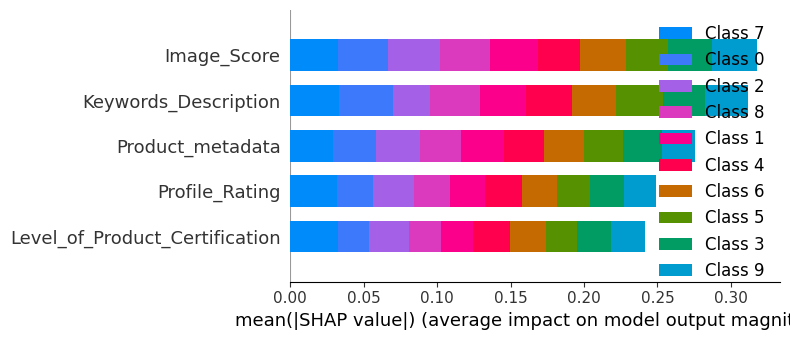

In [106]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [107]:
shap_values[0]

array([[ 5.13013046e-02,  1.06217657e-01,  9.83797060e-02,
         5.90291964e-02,  6.90721360e-02],
       [-2.29178946e-02, -2.99707436e-02, -3.52778314e-02,
        -1.95011684e-02, -8.33236209e-03],
       [ 3.33183249e-02, -9.19795791e-03, -5.73524555e-02,
        -1.34119882e-02,  3.06440767e-02],
       [ 9.20045132e-02,  1.41750036e-01,  3.77360295e-02,
         5.26860550e-02,  5.98233661e-02],
       [-3.12694139e-02,  2.49763551e-02, -5.60325064e-02,
        -6.19676904e-02,  8.29325562e-03],
       [-1.24528477e-02, -3.58120849e-02, -6.45779136e-03,
         2.94578312e-02,  9.26489272e-03],
       [ 3.20544891e-02,  3.03767271e-02, -6.05225368e-02,
        -1.82139246e-02,  3.05245267e-04],
       [ 1.05931602e-01, -9.25532533e-02,  4.91595253e-02,
         6.87245205e-02,  5.27376059e-02],
       [ 2.59745515e-02,  5.61168014e-02,  7.98507026e-02,
         1.94375897e-02,  1.02620355e-01],
       [-4.24967101e-02, -7.41326060e-04, -3.40810113e-03,
        -3.87069091e-02

In [108]:
shap_values_combined = np.mean(shap_values, axis=0)

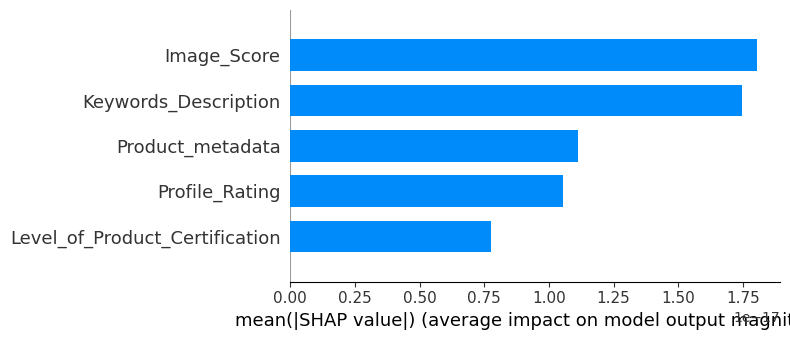

In [109]:
shap.summary_plot(shap_values_combined, x_test, plot_type="bar")

In [110]:
feature_names = x_test.columns if hasattr(x_test, 'columns') else [f"Feature_{i}" for i in range(shap_values_combined.shape[1])]

# Compute the mean SHAP values across samples
mean_shap_values = shap_values_combined.mean(axis=0)

# Create a dictionary mapping feature names to mean SHAP values
shap_values_dict = dict(zip(feature_names, mean_shap_values))

# Print the SHAP values
for feature_name, shap_value in shap_values_dict.items():
    print(f"Feature: {feature_name}, Mean SHAP value: {shap_value*100000000000000000/2}")

Feature: Image_Score, Mean SHAP value: 0.8285930399925742
Feature: Keywords_Description, Mean SHAP value: 0.7918687407182381
Feature: Product_metadata, Mean SHAP value: 0.4193544925375215
Feature: Profile_Rating, Mean SHAP value: 0.33609555839374955
Feature: Level_of_Product_Certification, Mean SHAP value: 0.1697142318173028
